# Data Info & Loading

This Data is a form of data from kaggle:
https://www.kaggle.com/wordsforthewise/lending-club


Description of data and columns:

    0	loan_amnt:	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
    1	term:	The number of payments on the loan. Values are in months and can be either 36 or 60.
    2	int_rate:	Interest Rate on the loan
    3	installment:	The monthly payment owed by the borrower if the loan originates.
    4	grade:	LC assigned loan grade
    5	sub_grade:	LC assigned loan subgrade
    6	emp_title:	The job title supplied by the Borrower when applying for the loan.
    7	emp_length:	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
    8	home_ownership:	The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
    9	annual_inc:	The self-reported annual income provided by the borrower during registration.
    10	verification_status:	Indicates if income was verified by LC, not verified, or if the income source was verified
    11	issue_d:	The month which the loan was funded
    12	loan_status:	Current status of the loan
    13	purpose:	A category provided by the borrower for the loan request.
    14	title:	The loan title provided by the borrower

    15dti:	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
    16  rliest_cr_line:	The month the borrower's earliest reported credit line was opened
    17  en_acc:	The number of open credit lines in the borrower's credit file.
    18	pub_rec:	Number of derogatory public records
    19  vol_bal:	Total credit revolving balance
    20	revol_util:	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
    21	total_acc:	The total number of credit lines currently in the borrower's credit file
    22	initial_list_status:	The initial listing status of the loan. Possible values are – W, F
    23	application_type:	Indicates whether the loan is an individual application or a joint application with two co-borrowers
    24	mort_acc:	Number of mortgage accounts.
    25	pub_rec_bankruptcies:	Number of public record bankruptcies
    26  address: The provided adress
    
 Loan Status is the target column!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')

In [3]:
len(df.columns)

27

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# EDA (Exploratory data analysis)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

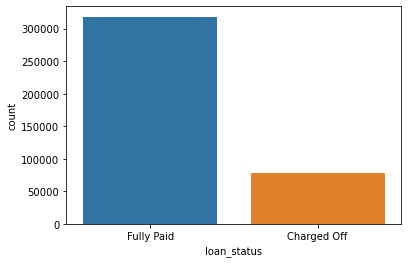

In [7]:
sns.countplot(x='loan_status', data=df)

<AxesSubplot:xlabel='term', ylabel='count'>

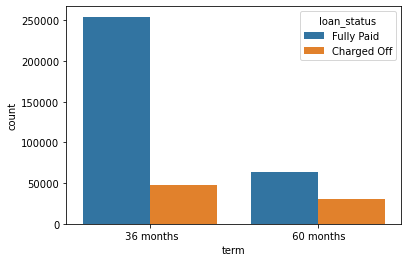

In [8]:
sns.countplot(x='term', data=df, hue='loan_status')

<AxesSubplot:xlabel='installment', ylabel='Count'>

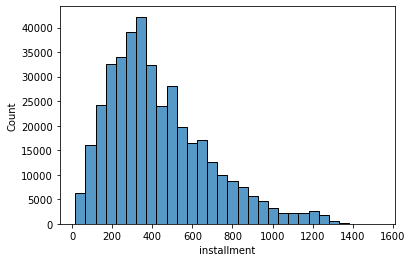

In [9]:
sns.histplot(x=df['installment'], data=df, bins=30)

<AxesSubplot:ylabel='count'>

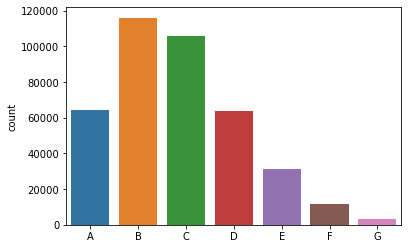

In [10]:
sns.countplot(x=np.sort(df['grade']))

<AxesSubplot:ylabel='count'>

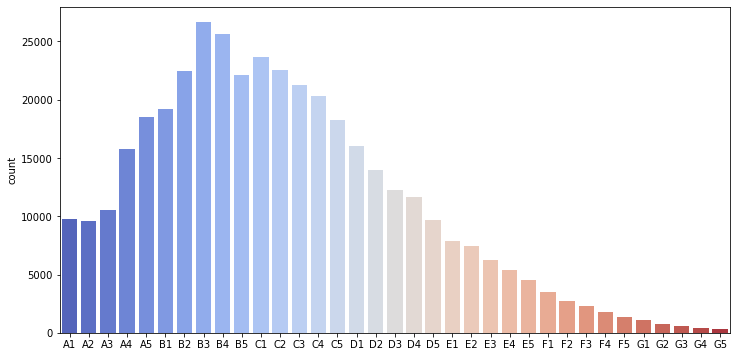

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x=np.sort(df['sub_grade']), data=df, palette='coolwarm')

In [12]:
np.sort(df['emp_length'].value_counts().index)

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year'],
      dtype=object)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

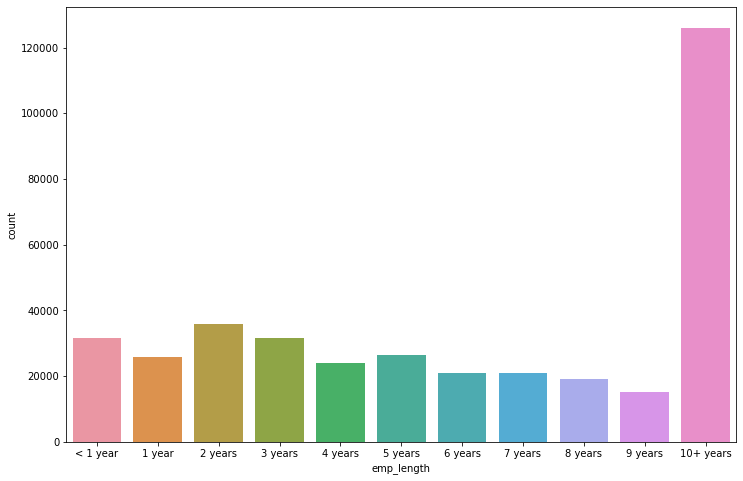

In [13]:
plt.figure(figsize=(12,8))
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '10+ years']
sns.countplot(x=df['emp_length'], data=df, order=order)

<AxesSubplot:>

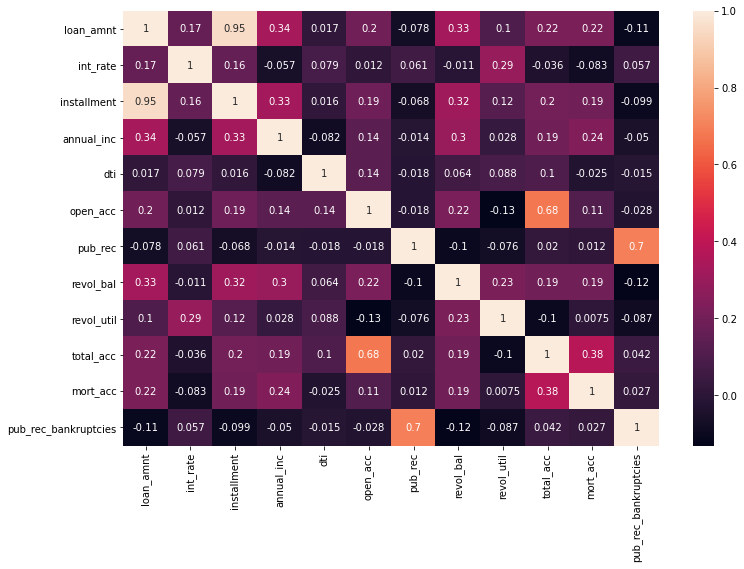

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

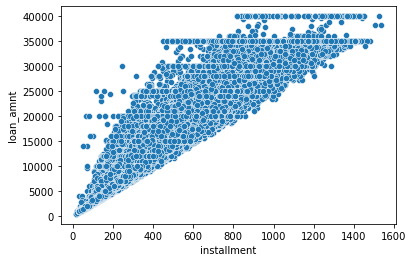

In [15]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)   # Strong correlation between Installment and Loan Amount

# Dealing With Missing Data

In [16]:
100 * (df.isnull().sum()) / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [17]:
df['emp_title'].value_counts() # to many job title we can drop it to get rid out of missing values

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
                                            ... 
Snap-on Tools                                  1
Supervisor, Supply Management Specialist       1
 Planner                                       1
Retail Sales, Production Assistant             1
Registered Nurse, Case Manager                 1
Name: emp_title, Length: 173105, dtype: int64

In [18]:
df = df.drop('emp_title', axis=1)

In [19]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [20]:
df['loan_status'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object>

In [21]:
#df['emp_length']
emp_paid = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_charged = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [22]:
paid_ratio = emp_paid/(emp_paid+emp_charged)

In [23]:
paid_ratio.index

Index(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year'],
      dtype='object', name='emp_length')

<AxesSubplot:>

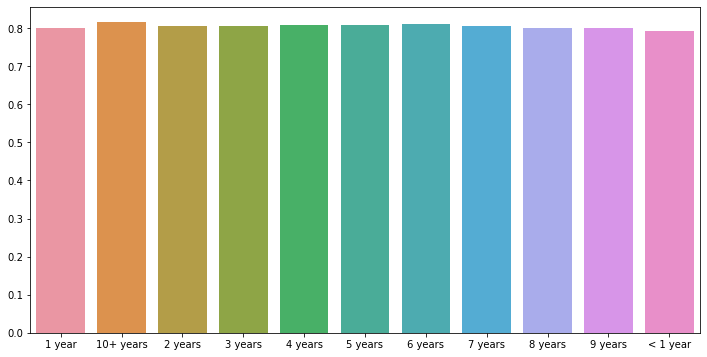

In [24]:
plt.figure(figsize=(12,6))

x= ['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year']

sns.barplot(x=x, y=paid_ratio.values)

In [25]:
# Figure above shows emp length does not have any effect on loan statues, we can drop this feature

In [26]:
df = df.drop('emp_length', axis=1)

In [27]:
df['title'].value_counts()

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
                            ...  
Second Time Around LC           1
Scott's Consolidation           1
Honda 500                       1
Transfer loan                   1
Working smarter                 1
Name: title, Length: 48817, dtype: int64

In [28]:
df = df.drop('title', axis=1)

In [29]:
100 * (df.isnull().sum())/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [30]:
df.corr()['mort_acc'].sort_values()  # Looks total_acc has strong correlation with total_acc we can use total_acc to fill its null

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [31]:
mort_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [32]:
mort_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [33]:
def fill_nan_mort(total_acc, mort_acc):
    
    if np.isnan(mort_acc):
        return mort_acc_avg[total_acc]
        
    else:
        return mort_acc

In [34]:
df['mort_acc'] = df[['total_acc','mort_acc']].apply(lambda x: fill_nan_mort(x['total_acc'], x['mort_acc']), axis=1)

In [35]:
100 * (df.isnull().sum()) / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [36]:
# Let to drop the remaining missing rows

In [37]:
df = df.dropna(axis=0)

In [38]:
100 * (df.isnull().sum()) / len(df)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

# Dealing with Categorical Variables

In [39]:
df.dtypes[df.dtypes == 'object']

term                   object
grade                  object
sub_grade              object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
purpose                object
earliest_cr_line       object
initial_list_status    object
application_type       object
address                object
dtype: object

In [40]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [41]:
df['term'][4]

' 60 months'

In [42]:
df['term'] = df['term'].map({' 36 months': 36, ' 60 months':60})

In [43]:
df = df.drop('grade', axis=1)

In [44]:
100 * (df.isnull().sum()) / len(df)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

In [45]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df, dummies], axis=1)

In [46]:
df = df.drop('sub_grade', axis=1)

In [47]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [48]:
df['home_ownership'] = df['home_ownership'].apply(lambda x:'OTHER' if x in ['NONE', 'ANY'] else x)

In [49]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [50]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df, dummies], axis=1)

In [51]:
df = df.drop('home_ownership', axis=1)

In [52]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [53]:
dummies = pd.get_dummies(df['verification_status'], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df = df.drop('verification_status', axis=1)

In [54]:
df['issue_d'] # we should drop this feature we do not know loan wil be issued or not, this can cause data leakage

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [55]:
df = df.drop('issue_d', axis=1)

In [56]:
df['loan_status'].value_counts()   # This is our target variable let's convert it to 1: Fully Paid, 0:Charged Off

Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64

In [57]:
df['loan_status'][4]

'Charged Off'

In [58]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [59]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [60]:
dummies = pd.get_dummies(df['purpose'], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df = df.drop('purpose', axis=1)

In [61]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))   #let to just keep year

In [62]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [63]:
dummies = pd.get_dummies(df['initial_list_status'], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df = df.drop('initial_list_status', axis=1)

In [64]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [65]:
dummies = pd.get_dummies(df['application_type'], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df = df.drop('application_type', axis=1)

In [66]:
df['address'].apply(lambda x: int(x[-5:]))

0         22690
1          5113
2          5113
3           813
4         11650
          ...  
396025    30723
396026     5113
396027    70466
396028    29597
396029    48052
Name: address, Length: 395219, dtype: int64

In [67]:
dummies = pd.get_dummies(df['address'].apply(lambda x: int(x[-5:])), drop_first=True)
df = pd.concat([df, dummies], axis=1)
df = df.drop('address', axis=1)

In [68]:
len(df.columns)

79

In [69]:
df.columns

Index([           'loan_amnt',                 'term',             'int_rate',
                'installment',           'annual_inc',          'loan_status',
                        'dti',     'earliest_cr_line',             'open_acc',
                    'pub_rec',            'revol_bal',           'revol_util',
                  'total_acc',             'mort_acc', 'pub_rec_bankruptcies',
                         'A2',                   'A3',                   'A4',
                         'A5',                   'B1',                   'B2',
                         'B3',                   'B4',                   'B5',
                         'C1',                   'C2',                   'C3',
                         'C4',                   'C5',                   'D1',
                         'D2',                   'D3',                   'D4',
                         'D5',                   'E1',                   'E2',
                         'E3',                   'E4

# Preparing Data for training 

In [70]:
X = df.drop('loan_status', axis=1).values
y = df['loan_status'].values

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
0.20 * len(df)

79043.8

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [76]:
X_test, X_hold, y_test, y_hold = train_test_split(X_test, y_test, test_size=0.50, random_state=101)

In [77]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_hold = scaler.transform(X_hold)

# Model Training

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
df.shape

(395219, 79)

In [85]:
model = Sequential()

model.add(Dense(79, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy')

In [86]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='auto')

In [87]:
model.fit(X_train, y_train, epochs=600, batch_size=256, callbacks=[early_stop],
                    verbose=1,
         validation_data=(X_test, y_test))

Epoch 1/600
1081/1081 [==============================] - 6s 5ms/step - loss: 0.2997 - val_loss: 0.2637
Epoch 2/600
1081/1081 [==============================] - 6s 5ms/step - loss: 0.2649 - val_loss: 0.2620
Epoch 3/600
1081/1081 [==============================] - 6s 5ms/step - loss: 0.2627 - val_loss: 0.2617
Epoch 4/600
1081/1081 [==============================] - 5s 5ms/step - loss: 0.2612 - val_loss: 0.2616
Epoch 5/600
1081/1081 [==============================] - 6s 5ms/step - loss: 0.2609 - val_loss: 0.2618
Epoch 6/600
1081/1081 [==============================] - 6s 5ms/step - loss: 0.2602 - val_loss: 0.2613
Epoch 7/600
1081/1081 [==============================] - 6s 5ms/step - loss: 0.2599 - val_loss: 0.2607
Epoch 8/600
1081/1081 [==============================] - 6s 5ms/step - loss: 0.2592 - val_loss: 0.2605
Epoch 9/600
1081/1081 [==============================] - 5s 5ms/step - loss: 0.2589 - val_loss: 0.2615
Epoch 10/600
1081/1081 [==============================] - 6s 5ms/step - l

# Model Evaluation

<AxesSubplot:>

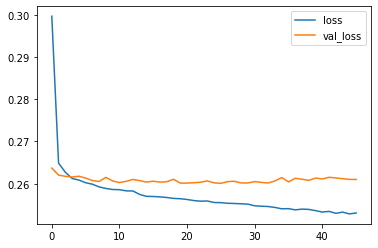

In [90]:
pd.DataFrame(model.history.history).plot()

In [92]:
predictions = np.round(model.predict(X_test))

In [97]:
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

In [95]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.45      0.61     11603
           1       0.88      0.99      0.93     47680

    accuracy                           0.89     59283
   macro avg       0.92      0.72      0.77     59283
weighted avg       0.90      0.89      0.87     59283



In [98]:
confusion_matrix(y_test, predictions)

array([[ 5205,  6398],
       [  247, 47433]], dtype=int64)

# Model Deployment

In [99]:
# The hold out data has been kept for deployment, test set was used for hyperparameter tunning,

In [ ]:
predictions = np.round(model.predict(X))